<a href="https://colab.research.google.com/github/Ramanand-Yadav/EligibilityForBankLoanMLProject/blob/main/Bank_Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Bank Loan Prediction Notebook**

In [7]:
# importing numpy and pandas 
import pandas as pd
import numpy as np

**read the dataset**

**This dataset is named Loan Prediction Dataset data set. The dataset** 

contains a set of 614 records under 13 attributes:

**Data Description**

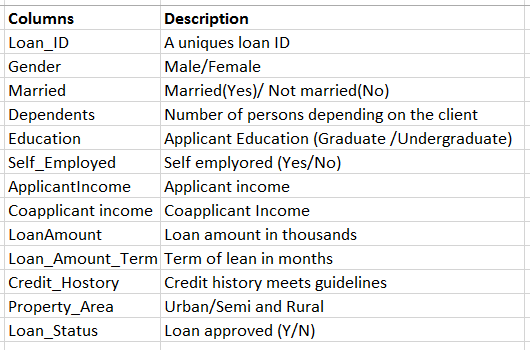


**The main objective for this dataset**

Using machine learning techniques to predict loan payments.

**target value: Loan_Status**

##Import Important Libraries 📕📗📘

In [ ]:
#ploting libraries
import matplotlib.pyplot as plt 
import seaborn as sns

#relevant ML libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

#ML models
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

**Life cycle of Machine Learning**

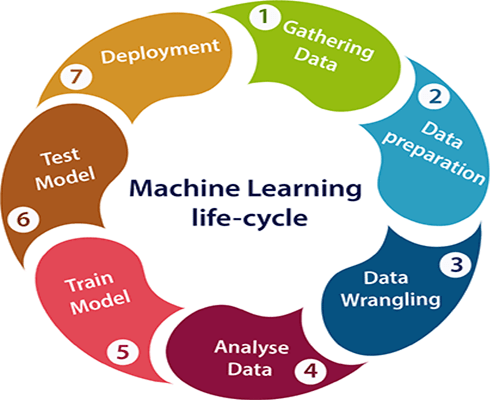

lookup the training and testing dataset




In [ ]:
train = pd.read_csv("https://raw.githubusercontent.com/Ramanand-Yadav/EligibilityForBankLoanMLProject/main/trainDataset.csv")
test = pd.read_csv("https://raw.githubusercontent.com/Ramanand-Yadav/EligibilityForBankLoanMLProject/main/testDataset.csv")

size of the training and testing dataset 

In [ ]:
print("Training Dataset : ", train.shape)
print("Testing Dataset : ", test.shape)

Training Dataset :  (614, 13)
Testing Dataset :  (367, 12)


let's focus on preprocessing 

In [ ]:
train.info()

In [ ]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


##Missing values 🚫
As you can see we have some missing data, let's have a look how many we have for each column:

In [ ]:
train.isnull().sum()

missing values are available in testing dataset also 

In [ ]:
test.isnull().sum().sort_values(ascending = False)

columns with null values :  **['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']**

null values in test : **['Gender', 'Dependents', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']**

let's take one by one and fill these values in both training and testing dataset.

*Gender*

In [ ]:
train['Gender'].isnull().sum()

13

In [ ]:
train['Gender'].value_counts()

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize = (10, 5))
sns.countplot(train['Gender'])
plt.show()

let's fill the missing value with the male value 

In [ ]:
df = train.copy()

In [ ]:
df['Gender'].dropna().mode().values[0]

'Male'

In [ ]:
train['Gender'] = train['Gender'].fillna(train['Gender'].dropna().mode().values[0])

In [ ]:
train['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [ ]:
test['Gender'] = test['Gender'].fillna(test['Gender'].dropna().mode().values[0])

Married

In [ ]:
train['Married'].isnull().sum()

3

In [ ]:
train['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize = (10, 5))
sns.countplot(train['Married'])
plt.show()

In [ ]:
train['Married'] = train['Married'].fillna(train['Married'].dropna().mode().values[0])

In [ ]:
train['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

Dependents

In [ ]:
train['Dependents'].isnull().sum()

15

In [ ]:
train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize = (10, 5))
sns.countplot(train['Dependents'])
plt.show()

In [ ]:
# let's do forward fill 
train['Dependents'] = train['Dependents'].ffill()

In [ ]:
train['Dependents'].value_counts()

In [ ]:
test['Dependents'].isnull().sum()

10

In [ ]:
test['Dependents'].value_counts()

In [ ]:
test['Dependents'] = test['Dependents'].ffill()

Self_Employed

In [ ]:
train['Self_Employed'].isnull().sum()

32

In [ ]:
train['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [ ]:
train['Self_Employed'] = train['Self_Employed'].fillna(train['Self_Employed'].dropna().mode().values[0])

In [ ]:
test['Self_Employed'].isnull().sum()


23

In [ ]:
test['Self_Employed'].value_counts()

No     307
Yes     37
Name: Self_Employed, dtype: int64

In [ ]:
test['Self_Employed'] = test['Self_Employed'].fillna(test['Self_Employed'].dropna().mode().values[0])

Loan_Amount

In [ ]:
train['LoanAmount'].isnull().sum()

22

In [ ]:
plt.figure(figsize=(10, 5))
sns.distplot(train['LoanAmount'])
plt.show()

In [ ]:
mean_value = train['LoanAmount'].mean()
train['LoanAmount'].fillna(value=mean_value, inplace=True)

In [ ]:
mean_value = test['LoanAmount'].mean()
test['LoanAmount'].fillna(value=mean_value, inplace=True)

Loan_Amount_Term

In [ ]:
train['Loan_Amount_Term'].isnull().sum()

14

In [ ]:
train['Loan_Amount_Term'].value_counts()

In [ ]:
plt.figure(figsize=(10, 5))
sns.distplot(train['Loan_Amount_Term'])
plt.show()

In [ ]:
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].dropna().mode().values[0])

In [ ]:
test['Loan_Amount_Term'] = test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].dropna().mode().values[0])

Credit_History

In [ ]:
train['Credit_History'].isnull().sum()

50

In [ ]:

train['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [ ]:
train['Credit_History'] = train['Credit_History'].fillna(train['Credit_History'].dropna().mode().values[0])
test['Credit_History'] = test['Credit_History'].fillna(test['Credit_History'].dropna().mode().values[0])

data is cleaned , let's check 

In [ ]:
train.isnull().sum()

test.isnull().sum()

##Encoding data to Numeric

In [ ]:
# drop the loan id columns 
train.drop('Loan_ID', axis=1, inplace=True)

In [ ]:
train.info()

In [ ]:
pd.crosstab(train['Gender'], train['Loan_Status'])

In [ ]:
pd.crosstab(df['Married'], train['Loan_Status'])

In [ ]:
pd.crosstab(train['Dependents'], train['Loan_Status'])

In [ ]:
pd.crosstab(train['Education'], train['Loan_Status'])

In [ ]:
pd.crosstab(train['Self_Employed'], train['Loan_Status'])

In [ ]:
train.columns

In [ ]:
pd.crosstab(train['Loan_Status'], train['Loan_Status'])

In [ ]:
to_numeric = {'Male': 1, 'Female': 0,
'Yes': 0, 'No': 1,
'Graduate': 0, 'Not Graduate': 1,
'Urban': 1, 'Semiurban': 2,'Rural': 0,
'Y': 1, 'N': 0,
'3+': 3}

In [ ]:
train.head()

In [ ]:
df = train.copy()

In [ ]:
df = df.applymap(lambda val : to_numeric.get(val) if val in to_numeric else val)

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df = df.astype('int')

In [ ]:
df.isnull().sum()

In [ ]:
df.Dependents.value_counts()

In [ ]:
# adding the new numeric values from the to_numeric variable to both datasets
# train = train.applymap(lambda val : to_numeric.get(val) if val in to_numeric else val)
test = test.applymap(lambda val : to_numeric.get(val) if val in to_numeric else val)

In [ ]:
train.info()

We can see the value of Dependents is Object type let's convert it into numeric

In [ ]:
# trdep = pd.to_numeric(train.Dependents)
# tedep = pd.to_numeric(test.Dependents)

In [ ]:
# train.drop('Dependents',axis=1, inplace=True)
# test.drop('Dependents',axis=1, inplace=True)

In [ ]:
# train = pd.concat([train, trdep], axis=1)
# test = pd.concat([test, tedep], axis=1)

In [ ]:
test.drop('Loan_ID',axis = 1, inplace=True)

In [ ]:
test = test.astype('int')

In [ ]:
test.info()

In [ ]:
test.isnull().sum()

##corr

In [ ]:
#correlation table
corr = train.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)


#Machine Learning Models

**Models You can use**
* Logistic Regression
* Support Vector machine 
* Decison Tree 
* Random Forest 
* Mixed Naive Bayes 
* Adaboost
* Stacking 
* XGBoost

In this module i will use some of them 

let's seprate the dataset 

In [ ]:
Y = df['Loan_Status']
X = df.drop('Loan_Status', axis=1)

In [ ]:
Y

In [ ]:
X.columns

In [ ]:
# X.drop('Loan_ID', axis = 1, inplace=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(491, 11) (123, 11) (491,) (123,)


In [ ]:
col = X.columns

In [ ]:
print(col)

##Logistic Regression


In [ ]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
X_train = ms.fit_transform(X_train)
X_test = ms.fit_transform(X_test)

In [ ]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_predict = LR.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_predict))

0.7886178861788617


In [ ]:
# print(classification_report(y_test, y_predict))

In [ ]:
# LR_SC = accuracy_score(y_test, y_predict)

##support vector machine 

In [ ]:
from sklearn.svm import SVC
svc = SVC()

In [ ]:
svc.fit(X_train, y_train)

SVC()

In [ ]:
y_predict = svc.predict(X_test)

In [ ]:
# print(classification_report(y_test, y_predict))

In [ ]:
SV_SC = accuracy_score(y_test, y_predict)
print("SVC ", f"{round(SV_SC*100, 2)}% accuracy")

SVC  78.86% accuracy


##Decision Tree 

In [ ]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeClassifier(criterion='gini', random_state=42, max_depth=10)

In [ ]:
DT.fit(X_train, y_train)
y_predict = DT.predict(X_test)

In [ ]:
# print(classification_report(y_test, y_predict))

In [ ]:
DT_SC = accuracy_score(y_test, y_predict)
print("Decison Tree : ", f"{round(DT_SC*100, 2)}% accurate")

Decison Tree :  70.73% accurate


##Mixed Navie Bayes 

In [ ]:
!pip install mixed_naive_bayes

In [ ]:
from mixed_naive_bayes import MixedNB

In [ ]:
MN = MixedNB()
MN.fit(X_train, y_train)

[]


MixedNB(alpha=0.5, var_smoothing=1e-09)

In [ ]:
y_predict = MN.predict(X_test)

In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.45      0.77      0.57        43
           1       0.80      0.50      0.62        80

    accuracy                           0.59       123
   macro avg       0.63      0.63      0.59       123
weighted avg       0.68      0.59      0.60       123



In [ ]:
MN_SC = accuracy_score(y_test, y_predict)
print("Mixed Naive Bayes : ", f"{round(MN_SC*100, 2)}% accurate")

Mixed Naive Bayes :  59.35% accurate


##XgBoost

In [ ]:
from xgboost import XGBClassifier
XG = XGBClassifier()

In [ ]:
XG.fit(X_train, y_train)
y_predict = XG.predict(X_test)

In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.55      0.63      0.59        43
           1       0.78      0.72      0.75        80

    accuracy                           0.69       123
   macro avg       0.67      0.68      0.67       123
weighted avg       0.70      0.69      0.70       123



In [ ]:
XG_SC = accuracy_score(y_test, y_predict)
print("XgBoost : ", f"{round(XG_SC*100, 2)}% accurate")

XgBoost :  69.11% accurate


##Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
AB = AdaBoostClassifier()

In [ ]:
AB.fit(X_train, y_train)
y_predict = AB.predict(X_test)

In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.55      0.60      0.58        43
           1       0.78      0.74      0.76        80

    accuracy                           0.69       123
   macro avg       0.66      0.67      0.67       123
weighted avg       0.70      0.69      0.69       123



In [ ]:
AB_SC = accuracy_score(y_test, y_predict)
print("AdaBoost : ", f"{round(AB_SC*100,2)}% accurate")

AdaBoost :  69.11% accurate


##Conclusion

maximum accuracy we get int into the logistic Regression ,

let's use logistics Regression as a final model

In [ ]:
# scores = [LR_SC, SV_SC, DT_SC, MN_SC, XG_SC, AB_SC]
# Models = pd.DataFrame({
#     'models':['Logistic Regression', 'SVC', 'Decision Tree', 'Mixed Naive Bayes', 'XgBoost', 'Adaboost'],
#     'score': scores
# })
# Models.sort_values(by='score', ascending = False)

##Pickle

In [ ]:
import pickle

In [ ]:
X12 = ms.fit_transform(X)

In [ ]:
LR3 = LogisticRegression()
LR3.fit(X12, Y)

LogisticRegression()

In [ ]:
y_predict12 = LR3.predict(X_test)
accuracy_score(y_test, y_predict12)

0.7886178861788617

#**Make PipeLine**

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
pipe = Pipeline(steps=[('ms', MinMaxScaler()), ('LR3', LogisticRegression())])

In [ ]:
XPipe = X.copy()

In [ ]:
xp_train, xp_test, yp_train, yp_test = train_test_split(XPipe, Y, test_size=0.2, random_state=0)

In [ ]:
pipe.fit(xp_train, yp_train)

Pipeline(steps=[('ms', MinMaxScaler()), ('LR3', LogisticRegression())])

In [ ]:
y_predictPipe = pipe.predict(xp_test)

In [ ]:
print(accuracy_score(yp_test, y_predictPipe))

0.8292682926829268


In [ ]:
pipe.fit(XPipe, Y)

Pipeline(steps=[('ms', MinMaxScaler()), ('LR3', LogisticRegression())])

In [ ]:
ypp = pipe.predict(xp_test)

In [ ]:
accuracy_score(yp_test, ypp)

0.8292682926829268

In [255]:
import pickle

In [256]:
# save the model
file = 'BankLoanmodel.pkl'
with open(file, 'wb') as f:
    pickle.dump(pipe, f)

# open the model
# file = '/content/model.pkl'
# with open(file, 'rb') as f:
#     model = pickle.load(f)

In [ ]:
file = '/content/BankLoanmodel.pkl'
with open(file, 'rb') as f:
    model = pickle.load(f)

In [ ]:
y_rf = model.predict(xp_test)

In [ ]:
accuracy_score(yp_test, y_rf)

In [ ]:
xp_train.info()

In [ ]:
col = xp_train.columns
print(col)

In [ ]:
xp_train['Loan_Amount_Term']

#Streamlit

In [ ]:
!pip install streamlit

In [279]:
!streamlit run app.py &>/dev/null &

In [280]:
!nohup npx localtunnel --port 8501 &

nohup: appending output to 'nohup.out'


In [273]:
# !cat "/content/nohup.out"

npx: installed 22 in 1.599s
your url is: https://purple-dragon-3.loca.lt


In [281]:
%%writefile app.py
import streamlit as st 
import pickle
from PIL import Image
import pandas as pd

model = pickle.load(open('BankLoanmodel.pkl', 'rb'))

def run():
  img1 = Image.open('/content/img1.jpg')
  st.image(img1)
  st.title("""
  Bank Loan Prediction using Machine Learning
  **The major aim of this project is to predict which of the customers will have their loan approved.**
""")

  # Account No
  account_no = st.text_input('Account number')

  # Full Name
  fn = st.text_input('Full Name')

  # For gender
  gen_display = ('Female','Male')
  gen_options = list(range(len(gen_display)))
  gen = st.selectbox("Gender",gen_options, format_func=lambda x: gen_display[x])

  # For Marital Status
  mar_display = ('Yes', 'No')
  mar_options = list(range(len(mar_display)))
  Married = st.selectbox("Marital Status", mar_options, format_func=lambda x: mar_display[x])

  # No of dependets
  dep_display = ('No','One','Two','More than Two')
  dep_options = list(range(len(dep_display)))
  Dependents = st.selectbox("Dependents",  dep_options, format_func=lambda x: dep_display[x])

  # For edu
  edu_display = ('Graduate','Not Graduate')
  edu_options = list(range(len(edu_display)))
  Education = st.selectbox("Education",edu_options, format_func=lambda x: edu_display[x])

  # For emp status
  emp_display = ('Job','Business')
  emp_options = list(range(len(emp_display)))
  Self_Employed = st.selectbox("Employment Status",emp_options, format_func=lambda x: emp_display[x])

  # Applicant Monthly Income
  ApplicantIncome = st.number_input("Applicant's Monthly Income($)",value=0)

  # Co-Applicant Monthly Income
  CoapplicantIncome = st.number_input("Co-Applicant's Monthly Income($)",value=0)

  # Loan AMount
  LoanAmount = st.number_input("Loan Amount",value=0)


  # For Credit Score
  cred_display = ('Between 300 to 500','Above 500')
  cred_options = list(range(len(cred_display)))
  Credit_History = st.selectbox("Credit Score",cred_options, format_func=lambda x: cred_display[x])


  # For Property status
  prop_display = ('Rural','Urban','Semi-Urban')
  prop_options = list(range(len(prop_display)))
  prop = st.selectbox("Property Area",prop_options, format_func=lambda x: prop_display[x])



  # loan duration
  dur_display = ['Less than 1 Month','1 Month', '2 Month','4 Month', '6 Month','8 Month','10 Month','1 Year','16 Month']
  dur_options = range(len(dur_display))
  dur = st.selectbox("Loan Duration",dur_options, format_func=lambda x: dur_display[x])
  duration = 0
  if dur == 0:
    duration = 12
  if dur == 1:
    duration = 36
  if dur == 2:
    duration = 60
  if dur == 3:
    duration = 120
  if dur == 4:
    duration = 180
  if dur==5:
    duration = 240
  if dur==6:
    duration = 300
  if dur==7:
    duration = 360
  if dur==8:
    duration = 480

  # features = pd.DataFrame({'Gender':gen, 'Married':Married, 'Dependents':Dependents, 'Education':Education,
  #                           'Self_Employed':Self_Employed,'ApplicantIncome':ApplicantIncome, 'CoapplicantIncome':CoapplicantIncome,
  #                           'LoanAmount':LoanAmount,'Loan_Amount_Term':duration, 'Credit_History':Credit_History, 'Property_Area':prop},index=[0])
  # features = features.astype('int')
  # st.write(features)




  if st.button("Submit"):

    features = pd.DataFrame({'Gender':gen, 'Married':Married, 'Dependents':Dependents, 'Education':Education,
                             'Self_Employed':Self_Employed,'ApplicantIncome':ApplicantIncome, 'CoapplicantIncome':CoapplicantIncome,
                             'LoanAmount':LoanAmount,'Loan_Amount_Term':duration, 'Credit_History':Credit_History, 'Property_Area':prop},index=[0])
    features = features.astype('int')
    # st.write(features)
    prediction = model.predict(features)
    lc = [str(i) for i in prediction]
    ans = int("".join(lc))
    if ans == 0:
        st.error(
            "Hello: " + fn +" || "
            "Account number: "+account_no +' || '
            'According to our Calculations, you will not get the loan from Bank'
        )
    else:
        st.success(
            "Hello: " + fn +" || "
            "Account number: "+account_no +' || '
            'Congratulations!! you will get the loan from Bank'
        )
  




run()

Overwriting app.py
